<a href="https://colab.research.google.com/github/mkdelavina/Data-Analytics-Portfolio/blob/main/colab/Immobilien_Scout_24_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Immoscout](https://raw.githubusercontent.com/juliandnl/redi_ss20/master/image.png)

# New Section

# Project - Immobilien Scout 24

---
## The description:
Welcome to your first project! Have you heard about Immobilienscout 24?  [Immobilienscout 24](https://https://www.immobilienscout24.de/). It the biggest platform for renting appartments in Germany. The company hires data analysts and data scientists for analyzing the market data. They are especially interested in the Berlin market. The company wants to understand where to publish advertisment.

---
 ## The dataset:
The datasets contains information about rental appartments in Berlin.
One row is for one appartment. The dataset contains 6 columns.  
- Region: is the Berlin district, where the flat is located
- Condition: is the condition of the flat
- Rooms: The number of rooms the flat has
- Rent: Monthly rent for the flat
- Year_Construction: The year in which the house was build
- Space: How many square meters does the flat have?

---
## The Task:
1.  What kind of information do we have?
2. In which conditions are the flats?
3. Where are the appartments located?
4. Where is the biggest and where is the smallest apartment?

> Bonus Questions:
5. What is the mean rent?



In [ ]:
# Please try to work on these tasks without using AI tools right away.
# It's ok to use AI support when you get stuck - but please try to work on your own first, that's the best way to learn!

# Please always copy the template colab file to your own drive (File -> Save a copy in Drive) and work on your copy, not on the template :)

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Read the dataset
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")

# 1. What kind of information do we have?
Do the following tasks:


1. Use .shape, .info(), .describe(), .head()
2. Select row with indexes 250:260 of column indexes 3 and 4
3. Select row with indexes 252, 253, 257 of column indexes 1, 3, 5

In [ ]:
rentals.shape

(764, 6)

In [ ]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             764 non-null    object 
 1   Condition          764 non-null    object 
 2   Rooms              764 non-null    float64
 3   Rent               764 non-null    float64
 4   Year_Construction  764 non-null    int64  
 5   Space              764 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 35.9+ KB


In [ ]:
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


In [ ]:
rentals.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [ ]:
 #250:260 of column indexes 3 and 4
 rentals.iloc[250:261,[3,4]]

,Rent,Year_Construction
250,2434.00,2015
251,2410.80,1914
252,2346.00,1914
253,1069.26,2019
254,699.00,2018
255,1258.00,2020
256,1942.72,2019
257,2250.00,2020
258,668.40,1995
259,1777.00,2017


In [ ]:
#252, 253, 257 of column indexes 1, 3, 5
rentals.iloc[[252,253,257],[1,3,5]]

,Condition,Rent,Space
252,first_time_use_after_refurbishment,2346.00,117.30
253,first_time_use,1069.26,60.45
257,first_time_use,2250.00,118.37


## Conclusion:
- There are 764 properties in the dataset
- There are 6 columns
- These are the information we have for each property: Region, Condition, Rooms, Rent, Year_Construction, Space
- Rooms, Rent, Year_Construction and Space are numerical


# 2. In which conditions are the flats?

Most of the apartments are in first time use condition.
There are also many apartments in mint, without information or well kept conditions.
Only 4 apartments need renovation.

In [ ]:
rentals.loc[:, "Condition"].value_counts()

,count
Condition,
first_time_use,270
mint_condition,143
no_information,111
well_kept,96
refurbished,40
first_time_use_after_refurbishment,36
fully_renovated,35
modernized,29
need_of_renovation,4


In [ ]:
rentals["Condition"].value_counts()

,count
Condition,
first_time_use,270
mint_condition,143
no_information,111
well_kept,96
refurbished,40
first_time_use_after_refurbishment,36
fully_renovated,35
modernized,29
need_of_renovation,4


<Axes: xlabel='Condition'>

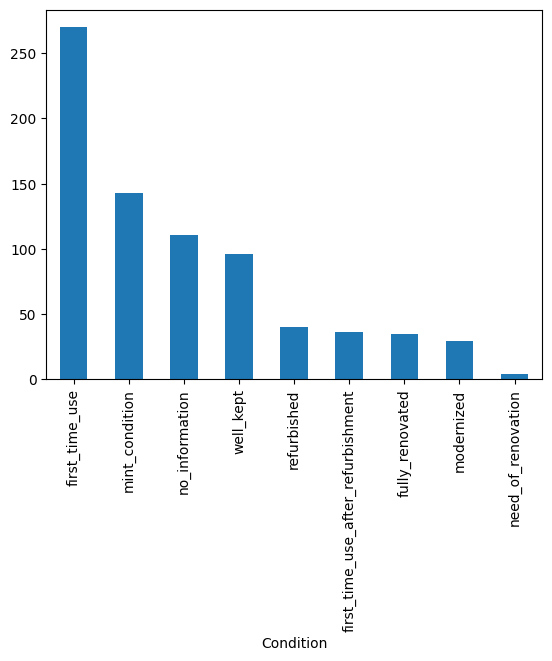

In [ ]:
rentals.loc[:, "Condition"].value_counts().plot.bar()


## Conclusion:
- These are the 9 types of property condition: first_time_use, mint_condition, no_information, well_kept, refurbished, first_time_use_after_refurbishment, fully_renovated, modernized, need_of_renovation
- The most common type is "first time use" with 270 aparments in this condition.
- The second most common is "Mint condition" with 143.
- One hunder and one appartments have no information.
- Only 4 apartments need renovation


# 3. Where are the appartments located?

In [ ]:
rentals.loc[:, "Region"].value_counts()

,count
Region,
Tiergarten,171
Mitte,153
Charlottenburg,79
Neukölln,59
Köpenick,55
Prenzlauer,53
Wilmersdorf,53
Friedrichsfelde,52
Kreuzberg,47


<Axes: ylabel='count'>

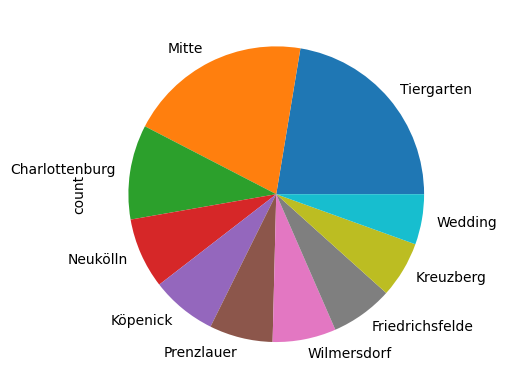

In [ ]:
rentals.loc[:, "Region"].value_counts().plot.pie()

## Conclusion:

- There are 10 regions in the dataset
- Tiergarten and Mitte have the most number with 171 and 153 respectively.
- The top three regions, including Charlottenburg , have around half the total number, while the other half is spread accross the other 7 regions.



# 4. Where is the biggest and the smallest apartment?

Remember that you have the methods .mix() and .max() at your disposal.

In [ ]:
rentals.loc[:,["Region","Space"]].min()

,0
Region,Charlottenburg
Space,14.0


In [ ]:
rentals.loc[:,["Region","Space"]].max()

,0
Region,Wilmersdorf
Space,413.91


14.0

## Conclusion:
- The biggest apartment is in Wilmersdorf with 413.91.
- The smallest apartment is in Charlottenburg with 14.0.

# BONUS  What is the mean rent?
Have a look at:
- https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

In [ ]:
rentals.loc[:,["Rent"]].mean()

,0
Rent,1768.560942


## Conclusion:
- The average rent is 1768.56

<h2>Review Criteria:<h2>

<h3><input type="checkbox"> 1. Are all questions answered? <br></h3>
<h3><input type="checkbox"> 2. Does all code run through? <br></h3>
<h3><input type="checkbox"> 3. Are the conclusions understandable?  <br></h3>
<h3><input type="checkbox"> 4. Are the bonus question answered?  <br></h3>

